In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2019-Oct.csv')
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
selected_month.shape

(42448764, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,NaN,shiseido,35.79
1,appliances.environment.water_heater,aqua,33.20
2,furniture.living_room.sofa,NaN,543.10
3,computers.notebook,lenovo,251.74
4,electronics.smartphone,apple,1081.98


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-elita,40.401493
1,accessories.bag,acer,48.979696
2,accessories.bag,acron,15.461552
3,accessories.bag,apple,100.800070
4,accessories.bag,asus,14.219047
...,...,...,...
3455,stationery.cartrige,sakura,14.513684
3456,stationery.cartrige,samsung,34.248018
3457,stationery.cartrige,superfine,10.751290
3458,stationery.cartrige,xerox,66.670000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-elita,40.401493,accessories,bag
1,accessories.bag,acer,48.979696,accessories,bag
2,accessories.bag,acron,15.461552,accessories,bag
3,accessories.bag,apple,100.800070,accessories,bag
4,accessories.bag,asus,14.219047,accessories,bag
...,...,...,...,...,...
3455,stationery.cartrige,sakura,14.513684,stationery,cartrige
3456,stationery.cartrige,samsung,34.248018,stationery,cartrige
3457,stationery.cartrige,superfine,10.751290,stationery,cartrige
3458,stationery.cartrige,xerox,66.670000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,40.401493,accessories,bag,accessories.bag,a-elita
1,48.979696,accessories,bag,accessories.bag,acer
2,15.461552,accessories,bag,accessories.bag,acron
3,100.800070,accessories,bag,accessories.bag,apple
4,14.219047,accessories,bag,accessories.bag,asus
...,...,...,...,...,...
3455,14.513684,stationery,cartrige,stationery.cartrige,sakura
3456,34.248018,stationery,cartrige,stationery.cartrige,samsung
3457,10.751290,stationery,cartrige,stationery.cartrige,superfine
3458,66.670000,stationery,cartrige,stationery.cartrige,xerox


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the October average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the October average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the October average price of {word}.')
    plt.show()
    
    return ax

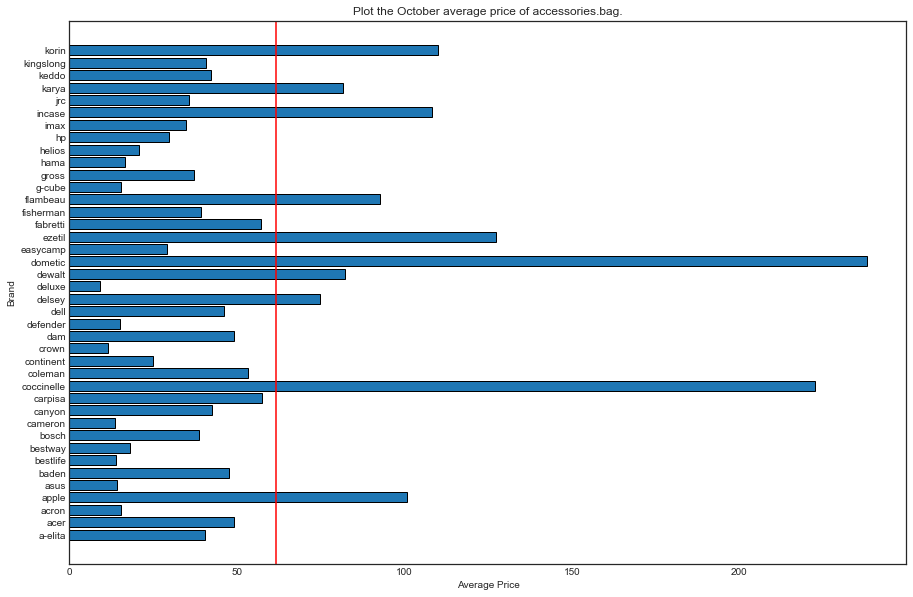

In [12]:
category_code_plot_avg_price('accessories.bag')

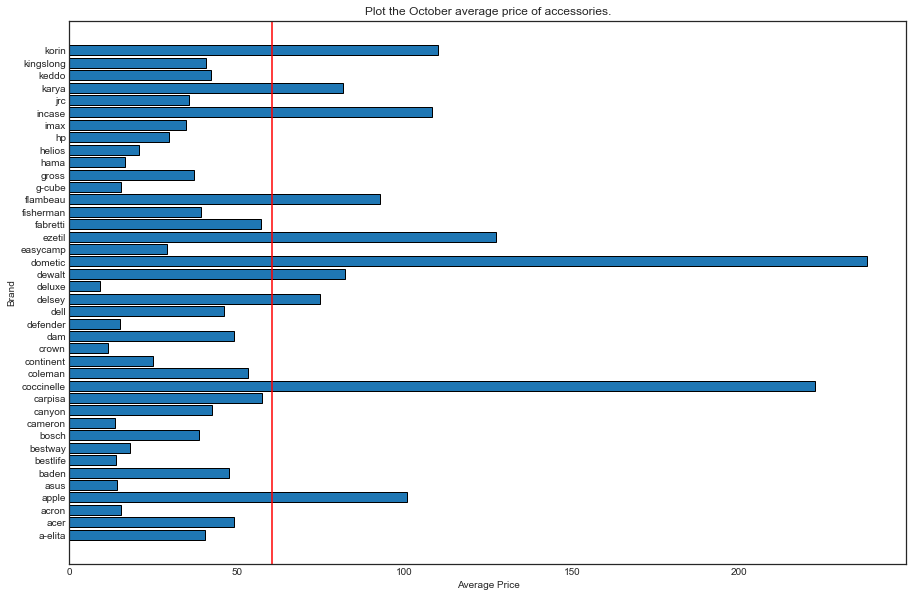

In [13]:
category_plot_avg_price('accessories')

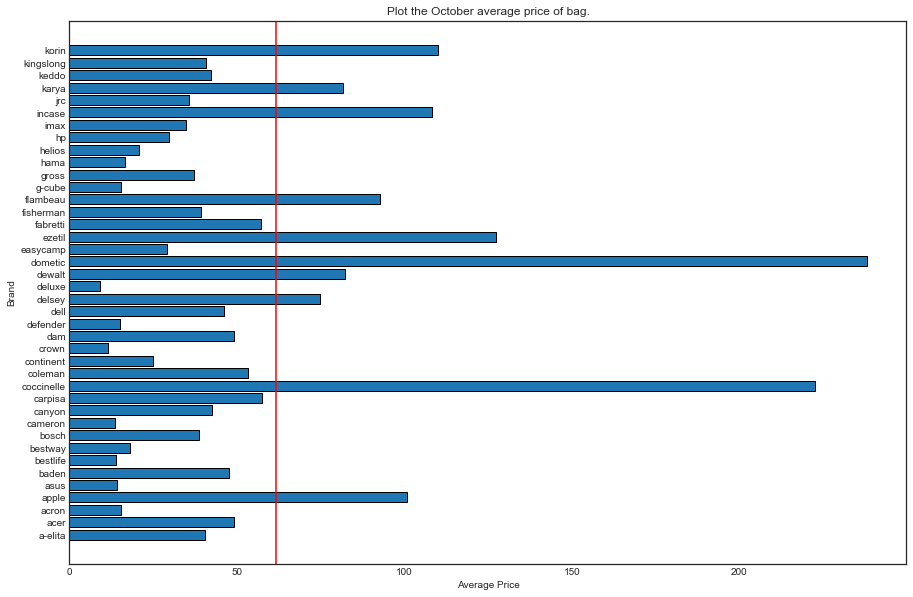

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,584.043301
1,apparel,715.521637
2,appliances,2393.170979
3,auto,1135.113469
4,computers,1801.820000
5,construction,1612.069990
6,country_yard,983.237745
7,electronics,2087.455158
8,furniture,1546.892963
9,kids,1801.820000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
2,appliances,2393.170979,kitchen.refrigerators,appliances.kitchen.refrigerators,climadiff
11,sport,2382.340526,bicycle,sport.bicycle,pinarello
7,electronics,2087.455158,clocks,electronics.clocks,rado
9,kids,1801.820000,carriage,kids.carriage,hartan
4,computers,1801.820000,notebook,computers.notebook,dreammachines
5,construction,1612.069990,tools.generator,construction.tools.generator,senci
8,furniture,1546.892963,universal.light,furniture.universal.light,aldit
3,auto,1135.113469,accessories.compressor,auto.accessories.compressor,schneider
6,country_yard,983.237745,lawn_mower,country_yard.lawn_mower,viking
1,apparel,715.521637,dress,apparel.dress,weekend


QUESTION 5:

            In what part of the day is your store most visited?

In [12]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2019-10-01 00:00:00 UTC,view,NaN
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater
2,2019-10-01 00:00:01 UTC,view,furniture.living_room.sofa
3,2019-10-01 00:00:01 UTC,view,computers.notebook
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone


In [13]:
Month.shape

(42448764, 3)

In [14]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [15]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2019-10-01 00:00:00+00:00     1083
2019-10-01 01:00:00+00:00      121
2019-10-01 02:00:00+00:00    22886
2019-10-01 03:00:00+00:00    49409
2019-10-01 04:00:00+00:00    55290
                             ...  
2019-10-31 19:00:00+00:00    41349
2019-10-31 20:00:00+00:00    21212
2019-10-31 21:00:00+00:00    12521
2019-10-31 22:00:00+00:00     8879
2019-10-31 23:00:00+00:00     7222
Freq: H, Name: event_type, Length: 744, dtype: int64


In [16]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2019-10-01 00:00:00+00:00    1244245
2019-10-02 00:00:00+00:00    1191328
2019-10-03 00:00:00+00:00    1127303
2019-10-04 00:00:00+00:00    1417190
2019-10-05 00:00:00+00:00    1330339
2019-10-06 00:00:00+00:00    1318379
2019-10-07 00:00:00+00:00    1200531
2019-10-08 00:00:00+00:00    1370633
2019-10-09 00:00:00+00:00    1347543
2019-10-10 00:00:00+00:00    1284077
2019-10-11 00:00:00+00:00    1495343
2019-10-12 00:00:00+00:00    1479896
2019-10-13 00:00:00+00:00    1639071
2019-10-14 00:00:00+00:00    1454702
2019-10-15 00:00:00+00:00    1542225
2019-10-16 00:00:00+00:00    1522390
2019-10-17 00:00:00+00:00    1407007
2019-10-18 00:00:00+00:00    1481799
2019-10-19 00:00:00+00:00    1449293
2019-10-20 00:00:00+00:00    1509992
2019-10-21 00:00:00+00:00    1405416
2019-10-22 00:00:00+00:00    1416872
2019-10-23 00:00:00+00:00    1381126
2019-10-24 00:00:00+00:00    1316501
2019-10-25 00:00:00+00:00    1435328
2019-10-26 00:00:00+00:00    1347268
2019-10-27 00:00:00+00:00  

In [17]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2019-10-07 00:00:00+00:00     8829315
2019-10-14 00:00:00+00:00    10071265
2019-10-21 00:00:00+00:00    10318122
2019-10-28 00:00:00+00:00     9546528
2019-11-04 00:00:00+00:00     3683534
Freq: W-MON, Name: event_type, dtype: int64


In [18]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2019-10-01 00:00:00+00:00,192435
2019-10-01 06:00:00+00:00,412675
2019-10-01 12:00:00+00:00,487146
2019-10-01 18:00:00+00:00,151989
2019-10-02 00:00:00+00:00,224380
...,...
2019-10-30 18:00:00+00:00,152917
2019-10-31 00:00:00+00:00,206604
2019-10-31 06:00:00+00:00,401647


In [19]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2019-10-13 06:00:00+00:00,610512
2019-10-15 12:00:00+00:00,589817
2019-10-13 12:00:00+00:00,579856
2019-10-16 12:00:00+00:00,579828
2019-10-18 12:00:00+00:00,575389
2019-10-11 12:00:00+00:00,558821
2019-10-14 12:00:00+00:00,558219
2019-10-20 12:00:00+00:00,552511
2019-10-04 12:00:00+00:00,543773


In [20]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2019-10-16 18:00:00+00:00,166845
2019-10-17 18:00:00+00:00,166178
2019-10-14 18:00:00+00:00,163669
2019-10-28 18:00:00+00:00,161957
2019-10-04 18:00:00+00:00,160000
2019-10-29 18:00:00+00:00,157466
2019-10-31 18:00:00+00:00,156355
2019-10-06 18:00:00+00:00,154834
2019-10-30 18:00:00+00:00,152917


In [21]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30,31]
Hours_df

,event_time,avg_hour_count,days
0,2019-10-01 00:00:00+00:00,51843.541667,1
1,2019-10-02 00:00:00+00:00,49638.666667,2
2,2019-10-03 00:00:00+00:00,46970.958333,3
3,2019-10-04 00:00:00+00:00,59049.583333,4
4,2019-10-05 00:00:00+00:00,55430.791667,5
5,2019-10-06 00:00:00+00:00,54932.458333,6
6,2019-10-07 00:00:00+00:00,50022.125000,7
7,2019-10-08 00:00:00+00:00,57109.708333,8
8,2019-10-09 00:00:00+00:00,56147.625000,9
9,2019-10-10 00:00:00+00:00,53503.208333,10


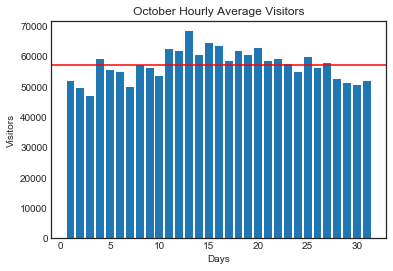

In [22]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('October Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [14]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,44600062,2103807459595387724,NaN
1,view,3900821,2053013552326770905,appliances.environment.water_heater
2,view,17200506,2053013559792632471,furniture.living_room.sofa
3,view,1307067,2053013558920217191,computers.notebook
4,view,1004237,2053013555631882655,electronics.smartphone
...,...,...,...,...
42448759,view,2300275,2053013560530830019,electronics.camera.video
42448760,view,10800172,2053013554994348409,NaN
42448761,view,5701038,2053013553970938175,auto.accessories.player
42448762,view,21407424,2053013561579406073,electronics.clocks


In [15]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.821628121591493

 - Plot the number of purchase per each category and show the conversion rate

In [4]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,544
1,accessories.bag,purchase,1253
2,accessories.bag,view,188926
3,accessories.umbrella,cart,5
4,accessories.umbrella,purchase,24
...,...,...,...
334,sport.trainer,purchase,367
335,sport.trainer,view,35272
336,stationery.cartrige,cart,106
337,stationery.cartrige,purchase,134


In [5]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
260,electronics.smartphone,purchase,338018
239,electronics.audio.headphone,purchase,30503
272,electronics.video.tv,purchase,21565
257,electronics.clocks,purchase,17906
122,appliances.kitchen.washer,purchase,16148
...,...,...,...
40,apparel.skirt,purchase,4
38,apparel.shorts,purchase,2
18,apparel.jumper,purchase,2
222,construction.tools.soldering,purchase,1


In [6]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,1253,view,188926
1,accessories.umbrella,purchase,24,view,3894
2,accessories.wallet,purchase,310,view,43282
3,apparel.belt,purchase,21,view,2448
4,apparel.costume,purchase,489,view,134511
...,...,...,...,...,...
116,sport.ski,purchase,16,view,3020
117,sport.snowboard,purchase,6,view,3747
118,sport.tennis,purchase,9,view,3526
119,sport.trainer,purchase,367,view,35272


In [7]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,1253,view,188926,accessories
1,purchase,24,view,3894,accessories
2,purchase,310,view,43282,accessories
3,purchase,21,view,2448,apparel
4,purchase,489,view,134511,apparel
...,...,...,...,...,...
116,purchase,16,view,3020,sport
117,purchase,6,view,3747,sport
118,purchase,9,view,3526,sport
119,purchase,367,view,35272,sport


In [8]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,1587,236102
1,apparel,purchase,view,8002,1532165
2,appliances,purchase,view,74996,4799936
3,auto,purchase,view,10620,993120
4,computers,purchase,view,27855,2268928
5,construction,purchase,view,7801,712690
6,country_yard,purchase,view,72,12548
7,electronics,purchase,view,423028,15038390
8,furniture,purchase,view,8301,1236452
9,kids,purchase,view,5482,512485


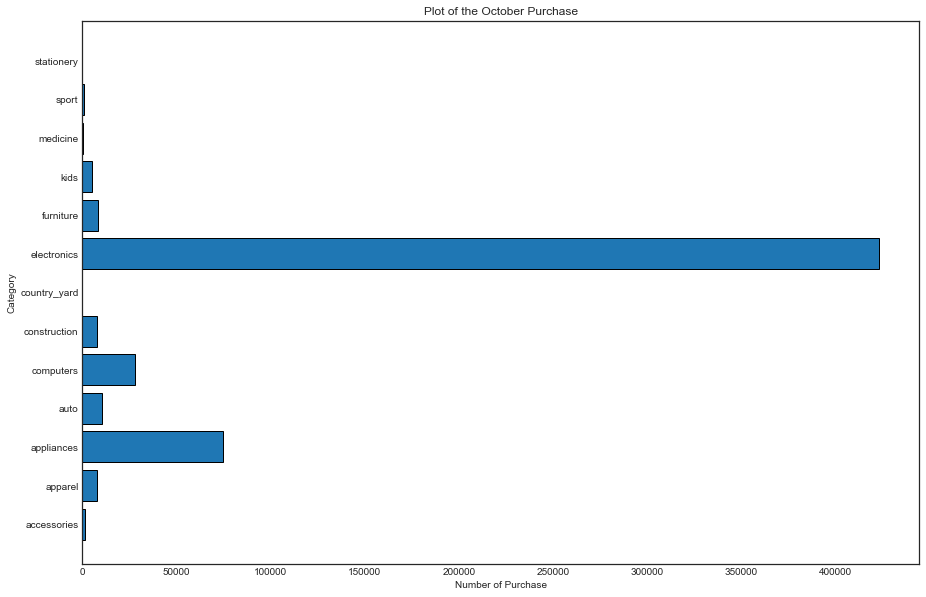

In [9]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the October Purchase')
plt.show()

In [10]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,1587,236102,0.672167
1,apparel,purchase,view,8002,1532165,0.522268
2,appliances,purchase,view,74996,4799936,1.562437
3,auto,purchase,view,10620,993120,1.069357
4,computers,purchase,view,27855,2268928,1.227672
5,construction,purchase,view,7801,712690,1.094585
6,country_yard,purchase,view,72,12548,0.573797
7,electronics,purchase,view,423028,15038390,2.812987
8,furniture,purchase,view,8301,1236452,0.671356
9,kids,purchase,view,5482,512485,1.069690


In [11]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
7,electronics,2.812987
10,medicine,2.218406
12,stationery,1.815718
2,appliances,1.562437
4,computers,1.227672
5,construction,1.094585
9,kids,1.069690
3,auto,1.069357
11,sport,0.709025
0,accessories,0.672167


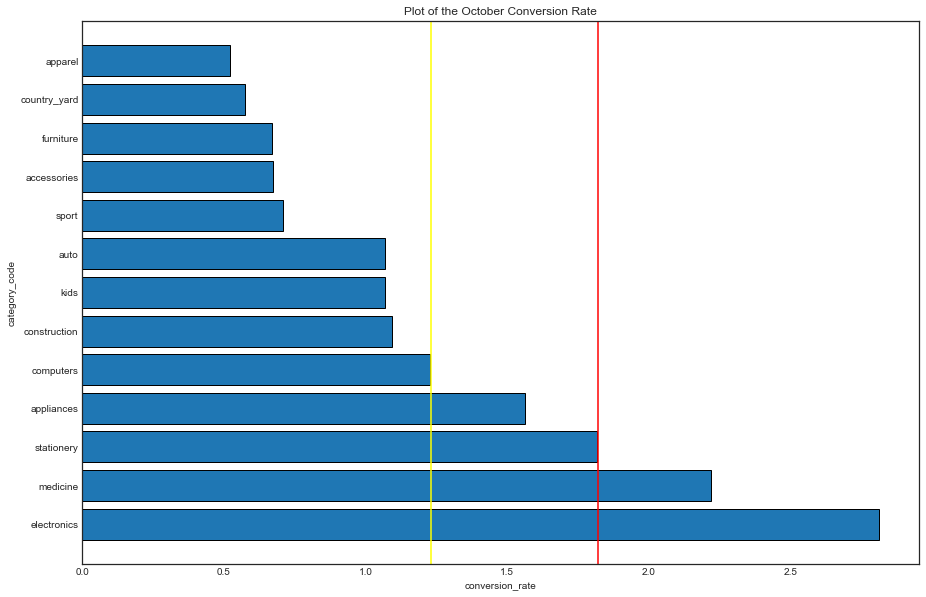

In [16]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the October Conversion Rate')
plt.show()

In [17]:
print(Merge_dec['conversion_rate'])

7     2.812987
10    2.218406
12    1.815718
2     1.562437
4     1.227672
5     1.094585
9     1.069690
3     1.069357
11    0.709025
0     0.672167
8     0.671356
6     0.573797
1     0.522268
Name: conversion_rate, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2019-Nov.csv')
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
selected_month.shape

(67501979, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,electronics.smartphone,xiaomi,489.07
1,appliances.sewing_machine,janome,293.65
2,NaN,creed,28.31
3,appliances.kitchen.washer,lg,712.87
4,electronics.smartphone,xiaomi,183.27


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-elita,47.972656
1,accessories.bag,acer,50.123370
2,accessories.bag,acron,15.238621
3,accessories.bag,amen,43.593651
4,accessories.bag,andromeda,28.610698
...,...,...,...
3872,stationery.cartrige,sakura,13.318667
3873,stationery.cartrige,samsung,33.915085
3874,stationery.cartrige,superfine,11.647600
3875,stationery.cartrige,xerox,66.670000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-elita,47.972656,accessories,bag
1,accessories.bag,acer,50.123370,accessories,bag
2,accessories.bag,acron,15.238621,accessories,bag
3,accessories.bag,amen,43.593651,accessories,bag
4,accessories.bag,andromeda,28.610698,accessories,bag
...,...,...,...,...,...
3872,stationery.cartrige,sakura,13.318667,stationery,cartrige
3873,stationery.cartrige,samsung,33.915085,stationery,cartrige
3874,stationery.cartrige,superfine,11.647600,stationery,cartrige
3875,stationery.cartrige,xerox,66.670000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,47.972656,accessories,bag,accessories.bag,a-elita
1,50.123370,accessories,bag,accessories.bag,acer
2,15.238621,accessories,bag,accessories.bag,acron
3,43.593651,accessories,bag,accessories.bag,amen
4,28.610698,accessories,bag,accessories.bag,andromeda
...,...,...,...,...,...
3872,13.318667,stationery,cartrige,stationery.cartrige,sakura
3873,33.915085,stationery,cartrige,stationery.cartrige,samsung
3874,11.647600,stationery,cartrige,stationery.cartrige,superfine
3875,66.670000,stationery,cartrige,stationery.cartrige,xerox


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the November average price of {word}.')
    plt.show()
    
    return ax

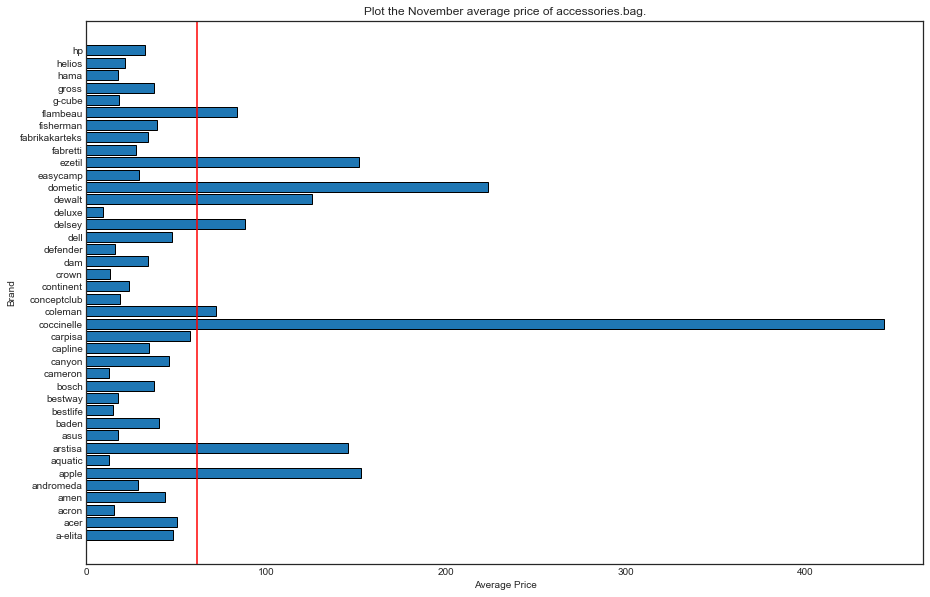

In [12]:
category_code_plot_avg_price('accessories.bag')

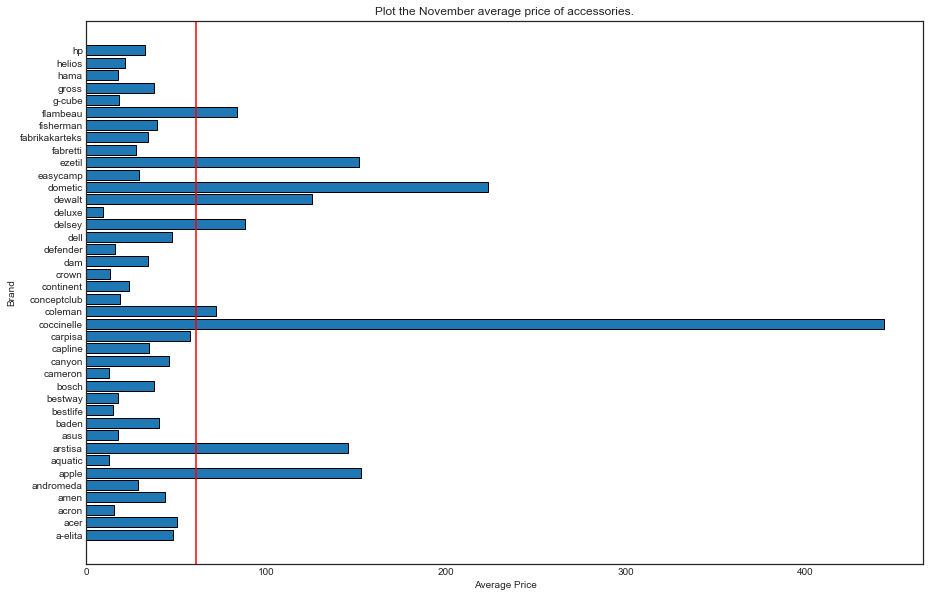

In [13]:
category_plot_avg_price('accessories')

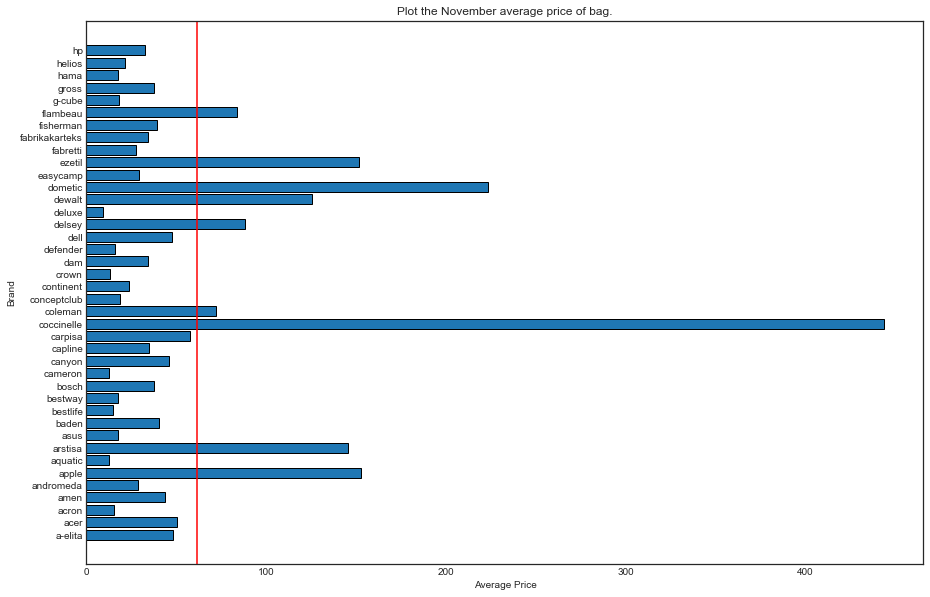

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,773.611582
1,apparel,1332.252174
2,appliances,2234.804821
3,auto,1123.877582
4,computers,2558.752243
5,construction,2199.047736
6,country_yard,896.938462
7,electronics,2562.630000
8,furniture,2006.490000
9,kids,1801.820000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
11,sport,2573.810000,bicycle,sport.bicycle,pinarello
7,electronics,2562.630000,audio.acoustic,electronics.audio.acoustic,fly
4,computers,2558.752243,notebook,computers.notebook,dreammachines
2,appliances,2234.804821,kitchen.washer,appliances.kitchen.washer,siemens
5,construction,2199.047736,tools.pump,construction.tools.pump,helix
8,furniture,2006.490000,bathroom.bath,furniture.bathroom.bath,jacobdelafon
9,kids,1801.820000,carriage,kids.carriage,hartan
1,apparel,1332.252174,shoes,apparel.shoes,sergiorossi
3,auto,1123.877582,accessories.compressor,auto.accessories.compressor,metabo
6,country_yard,896.938462,lawn_mower,country_yard.lawn_mower,viking


QUESTION 5:

            In what part of the day is your store most visited?

In [3]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2019-11-01 00:00:00 UTC,view,electronics.smartphone
1,2019-11-01 00:00:00 UTC,view,appliances.sewing_machine
2,2019-11-01 00:00:01 UTC,view,NaN
3,2019-11-01 00:00:01 UTC,view,appliances.kitchen.washer
4,2019-11-01 00:00:01 UTC,view,electronics.smartphone


In [4]:
Month.shape

(67501979, 3)

In [5]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [6]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2019-11-01 00:00:00+00:00    10887
2019-11-01 01:00:00+00:00    14000
2019-11-01 02:00:00+00:00    32498
2019-11-01 03:00:00+00:00    49348
2019-11-01 04:00:00+00:00    61480
                             ...  
2019-11-30 19:00:00+00:00    64202
2019-11-30 20:00:00+00:00    40506
2019-11-30 21:00:00+00:00    23230
2019-11-30 22:00:00+00:00    14195
2019-11-30 23:00:00+00:00     9953
Freq: H, Name: event_type, Length: 720, dtype: int64


In [7]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2019-11-01 00:00:00+00:00    1445360
2019-11-02 00:00:00+00:00    1555538
2019-11-03 00:00:00+00:00    1567774
2019-11-04 00:00:00+00:00    1793128
2019-11-05 00:00:00+00:00    1717244
2019-11-06 00:00:00+00:00    1694821
2019-11-07 00:00:00+00:00    1796833
2019-11-08 00:00:00+00:00    1896402
2019-11-09 00:00:00+00:00    1877906
2019-11-10 00:00:00+00:00    1940575
2019-11-11 00:00:00+00:00    2009390
2019-11-12 00:00:00+00:00    1987569
2019-11-13 00:00:00+00:00    2019165
2019-11-14 00:00:00+00:00    3069726
2019-11-15 00:00:00+00:00    6220416
2019-11-16 00:00:00+00:00    6502957
2019-11-17 00:00:00+00:00    6395377
2019-11-18 00:00:00+00:00    2021512
2019-11-19 00:00:00+00:00    1728541
2019-11-20 00:00:00+00:00    1700086
2019-11-21 00:00:00+00:00    1677336
2019-11-22 00:00:00+00:00    1568243
2019-11-23 00:00:00+00:00    1561716
2019-11-24 00:00:00+00:00    1591765
2019-11-25 00:00:00+00:00    1593582
2019-11-26 00:00:00+00:00    1654879
2019-11-27 00:00:00+00:00  

In [8]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2019-11-04 00:00:00+00:00     6361800
2019-11-11 00:00:00+00:00    12933171
2019-11-18 00:00:00+00:00    28216722
2019-11-25 00:00:00+00:00    11421269
2019-12-02 00:00:00+00:00     8569017
Freq: W-MON, Name: event_type, dtype: int64


In [9]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2019-11-01 00:00:00+00:00,241663
2019-11-01 06:00:00+00:00,459285
2019-11-01 12:00:00+00:00,547059
2019-11-01 18:00:00+00:00,197353
2019-11-02 00:00:00+00:00,270586
...,...
2019-11-29 18:00:00+00:00,231300
2019-11-30 00:00:00+00:00,286329
2019-11-30 06:00:00+00:00,574830


In [10]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2019-11-17 12:00:00+00:00,2779318
2019-11-16 06:00:00+00:00,2255272
2019-11-17 06:00:00+00:00,2216935
2019-11-16 12:00:00+00:00,2068622
2019-11-15 06:00:00+00:00,1920827
2019-11-15 12:00:00+00:00,1903648
2019-11-15 00:00:00+00:00,1398559
2019-11-16 00:00:00+00:00,1278779
2019-11-17 00:00:00+00:00,1161548


In [11]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2019-11-02 18:00:00+00:00,224489
2019-11-04 18:00:00+00:00,214784
2019-11-06 18:00:00+00:00,214571
2019-11-23 18:00:00+00:00,211021
2019-11-07 18:00:00+00:00,210131
2019-11-24 18:00:00+00:00,202265
2019-11-21 18:00:00+00:00,200663
2019-11-19 18:00:00+00:00,199929
2019-11-20 18:00:00+00:00,198275


In [12]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30]
Hours_df

,event_time,avg_hour_count,days
0,2019-11-01 00:00:00+00:00,60223.333333,1
1,2019-11-02 00:00:00+00:00,64814.083333,2
2,2019-11-03 00:00:00+00:00,65323.916667,3
3,2019-11-04 00:00:00+00:00,74713.666667,4
4,2019-11-05 00:00:00+00:00,71551.833333,5
5,2019-11-06 00:00:00+00:00,70617.541667,6
6,2019-11-07 00:00:00+00:00,74868.041667,7
7,2019-11-08 00:00:00+00:00,79016.750000,8
8,2019-11-09 00:00:00+00:00,78246.083333,9
9,2019-11-10 00:00:00+00:00,80857.291667,10


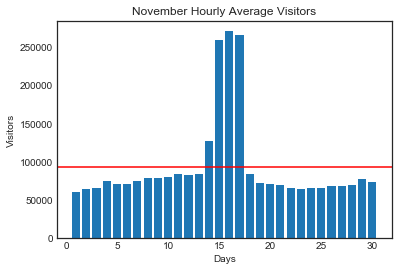

In [13]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('November Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [31]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,1003461,2053013555631882655,electronics.smartphone
1,view,5000088,2053013566100866035,appliances.sewing_machine
2,view,17302664,2053013553853497655,NaN
3,view,3601530,2053013563810775923,appliances.kitchen.washer
4,view,1004775,2053013555631882655,electronics.smartphone
...,...,...,...,...
67501974,view,15700137,2053013559733912211,NaN
67501975,view,28719425,2053013565639492569,apparel.shoes
67501976,view,1004833,2053013555631882655,electronics.smartphone
67501977,view,2701706,2053013563911439225,appliances.kitchen.refrigerators


In [15]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.442723602813325

 - Plot the number of purchase per each category and show the conversion rate

In [59]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,6319
1,accessories.bag,purchase,1762
2,accessories.bag,view,306574
3,accessories.umbrella,cart,73
4,accessories.umbrella,purchase,26
...,...,...,...
377,sport.trainer,purchase,693
378,sport.trainer,view,93430
379,stationery.cartrige,cart,644
380,stationery.cartrige,purchase,191


In [60]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
296,electronics.smartphone,purchase,382647
275,electronics.audio.headphone,purchase,40834
308,electronics.video.tv,purchase,30274
293,electronics.clocks,purchase,23237
148,appliances.kitchen.washer,purchase,19772
...,...,...,...
256,construction.tools.soldering,purchase,6
266,country_yard.furniture.hammok,purchase,4
58,apparel.shorts,purchase,2
109,appliances.kitchen.fryer,purchase,1


In [61]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,1762,view,306574
1,accessories.umbrella,purchase,26,view,4890
2,accessories.wallet,purchase,366,view,68909
3,apparel.belt,purchase,41,view,4527
4,apparel.costume,purchase,879,view,241589
...,...,...,...,...,...
121,sport.ski,purchase,74,view,16382
122,sport.snowboard,purchase,138,view,17375
123,sport.tennis,purchase,48,view,7539
124,sport.trainer,purchase,693,view,93430


In [62]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,1762,view,306574,accessories
1,purchase,26,view,4890,accessories
2,purchase,366,view,68909,accessories
3,purchase,41,view,4527,apparel
4,purchase,879,view,241589,apparel
...,...,...,...,...,...
121,purchase,74,view,16382,sport
122,purchase,138,view,17375,sport
123,purchase,48,view,7539,sport
124,purchase,693,view,93430,sport


In [63]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,2154,380373
1,apparel,purchase,view,14215,2941217
2,appliances,purchase,view,99026,8037980
3,auto,purchase,view,10719,1164278
4,computers,purchase,view,34477,4029049
5,construction,purchase,view,8699,1047072
6,country_yard,purchase,view,60,17297
7,electronics,purchase,view,493639,21988192
8,furniture,purchase,view,11542,2058798
9,kids,purchase,view,6166,779517


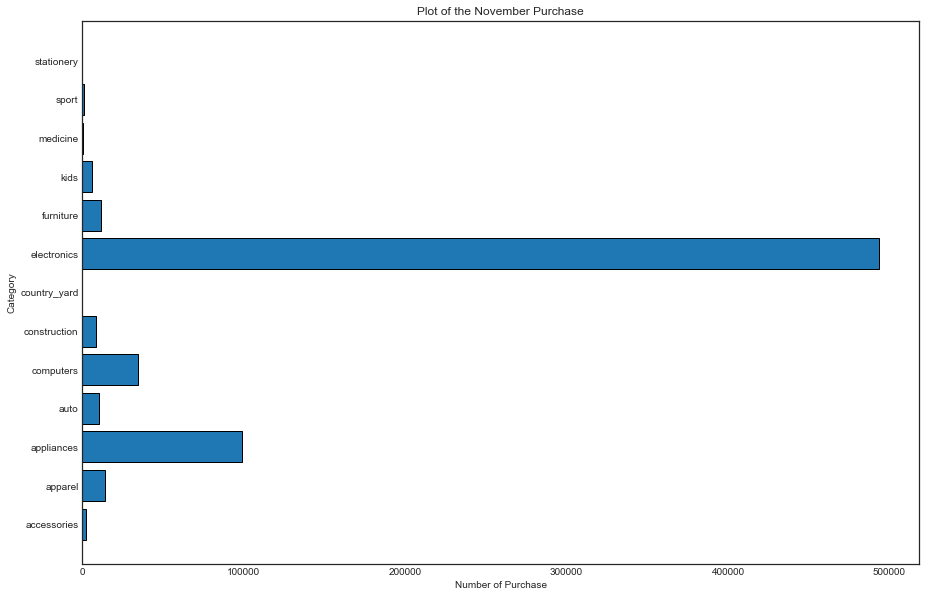

In [64]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the November Purchase')
plt.show()

In [65]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,2154,380373,0.566286
1,apparel,purchase,view,14215,2941217,0.483303
2,appliances,purchase,view,99026,8037980,1.231976
3,auto,purchase,view,10719,1164278,0.920656
4,computers,purchase,view,34477,4029049,0.855711
5,construction,purchase,view,8699,1047072,0.830793
6,country_yard,purchase,view,60,17297,0.346881
7,electronics,purchase,view,493639,21988192,2.245019
8,furniture,purchase,view,11542,2058798,0.560618
9,kids,purchase,view,6166,779517,0.791003


In [66]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
7,electronics,2.245019
10,medicine,1.656714
12,stationery,1.599263
2,appliances,1.231976
3,auto,0.920656
4,computers,0.855711
5,construction,0.830793
9,kids,0.791003
11,sport,0.618451
0,accessories,0.566286


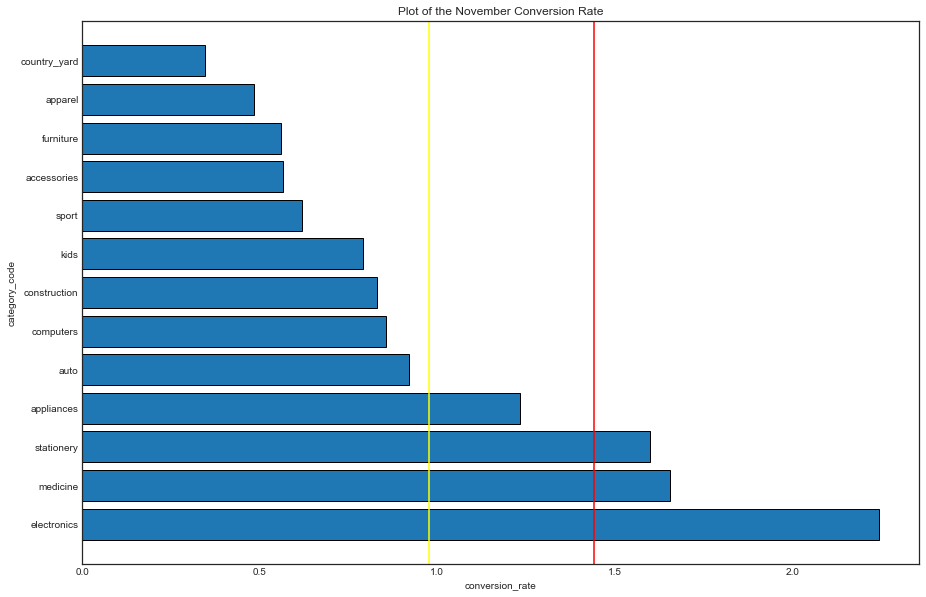

In [67]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the November Conversion Rate')
plt.show()

In [68]:
print(Merge_dec['conversion_rate'])

7     2.245019
10    1.656714
12    1.599263
2     1.231976
3     0.920656
4     0.855711
5     0.830793
9     0.791003
11    0.618451
0     0.566286
8     0.560618
1     0.483303
6     0.346881
Name: conversion_rate, dtype: float64


# Questions 1,2,4,7

In [1]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_oct=pd.read_csv('/home/dias/Desktop/HW/2019-Oct.csv')
df_nov=pd.read_csv('/home/dias/Desktop/HW/2019-Nov.csv')
df_oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [14]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [7]:
#Getting information about dataset
df_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [4]:
df_oct.describe()

,product_id,category_id,price,user_id
count,42448764.000000,42448764.000000,42448764.000000,42448764.000000
mean,10549932.375843,2057404237940798720.000000,290.323661,533537147.508169
std,11881906.970608,18439264661404152.000000,358.269155,18523738.174654
min,1000978.000000,2053013552226107648.000000,0.000000,33869381.000000
25%,1005157.000000,2053013555464110592.000000,65.980000,515904318.000000
50%,5000470.000000,2053013555631882752.000000,162.930000,529696452.000000
75%,16000305.000000,2053013563424899840.000000,358.570000,551578838.250000
max,60500010.000000,2175419595093967616.000000,2574.070000,566280860.000000


In [6]:
df_oct.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [5]:
df_oct.event_type.unique()

array(['view', 'purchase', 'cart'], dtype=object)

In [8]:
#Here I group all event_time values by product_id and user_id 
table1_oct = pd.pivot_table(df_oct, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1_oct.dropna()
complete_funnels_oct = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in October = {}'.format(complete_funnels_oct/len(table1_oct)))

Rate of complete funnels in October = 0.015003799185073729


In [9]:
#Same operations held for November dataset
table1_nov = pd.pivot_table(df_nov, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1_nov.dropna()
complete_funnels_nov = a.min(axis=1).sum()

print('Rate of complete funnels in November = {}'.format(complete_funnels_nov/len(table1_oct)))

Rate of complete funnels in November = 0.03352365727446334


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [46]:
#Here I grouped by session and took all average numbers of events in event_type
mean_october=[]
for i in df_oct.event_type.unique():
    mean_october.append(df_oct[df_oct.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean_october)):
    mean_october[i]=mean_october[i].mean()
mean_october

[4.412088066056358, 1.1799494885316728, 1.616679200903163]

The operation users repeat more on average within a session in October:  view


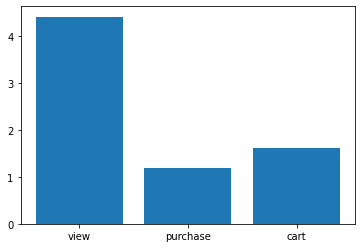

In [51]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df_oct.event_type.unique(),mean_october);
print('The operation users repeat more on average within a session in October: ', df_oct.event_type.unique()[0])

The operation users repeat more on average within a session in November:  view


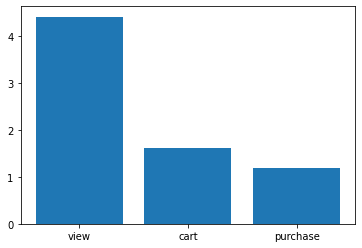

In [52]:
#same for November
mean_november=[]
for i in df_nov.event_type.unique():
    mean_november.append(df_oct[df_oct.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(b)):
    mean_november[i]=mean_november[i].mean()
plt.bar(df_nov.event_type.unique(),mean_november);
print('The operation users repeat more on average within a session in November: ', df_nov.event_type.unique()[0])

### How many times, on average, a user views a product before adding it to the cart?

In [ ]:
#I made a pivot table of the times of first events that users made
table_oct = pd.pivot_table(df_oct, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table_nov = pd.pivot_table(df_nov, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table_oct

In [52]:
#and then counted probability of user to view a product before buying
answer = len(table_oct[table_oct['view']<table_oct['cart']])/len(table_oct)
answer

0.021312849054150936

### What’s the probability that products added once to the cart are effectively bought?

In [53]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table_oct[table_oct['cart']<table_oct['purchase']])/len(table_oct['cart'].dropna())
answer

0.4929111834196227

In [62]:
answer = len(table_nov[table_nov['cart']<table_nov['purchase']])/len(table_nov['cart'].dropna())
answer

0.3704014963453317

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [153]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df_oct[['category', 'subcategory']] = df_oct['category_code'].str.split('.', 1, expand=True)
df_nov[['category', 'subcategory']] = df_nov['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat_oct=df_oct[df_oct['event_type']=='purchase'].groupby(['product_id','category']).count()
group_purchase_by_cat_nov=df_nov[df_nov['event_type']=='purchase'].groupby(['product_id','category']).count()

In [68]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category   
1004856     electronics    28944
1004767     electronics    21806
1004833     electronics    12697
1005115     electronics    12543
4804056     electronics    12381
1004870     electronics    10615
1002544     electronics    10549
1004249     electronics     9090
1004836     electronics     7691
1005105     electronics     7293
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

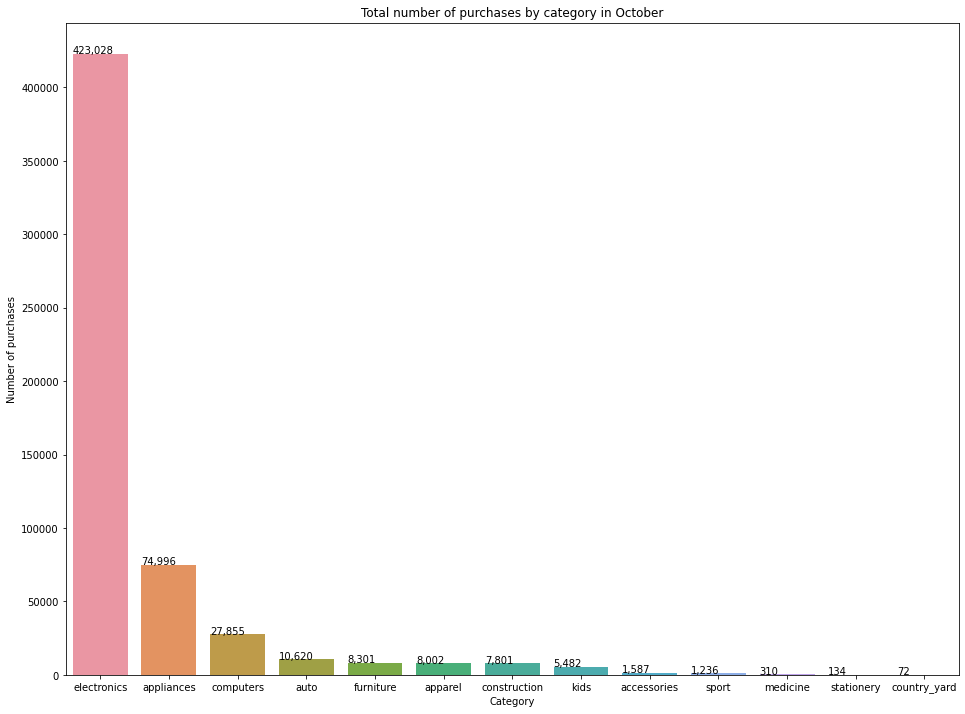

In [154]:
group_purchase_by_cat_oct=df_oct[df_oct['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat_oct = group_purchase_by_cat_oct.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category_oct = [str(i) for i in sorted_group_purchase_by_cat_oct.index]
ax= sns.barplot(index_category_oct,sorted_group_purchase_by_cat_oct)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in October')
plt.xlabel('Category')
plt.ylabel('Number of purchases')

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

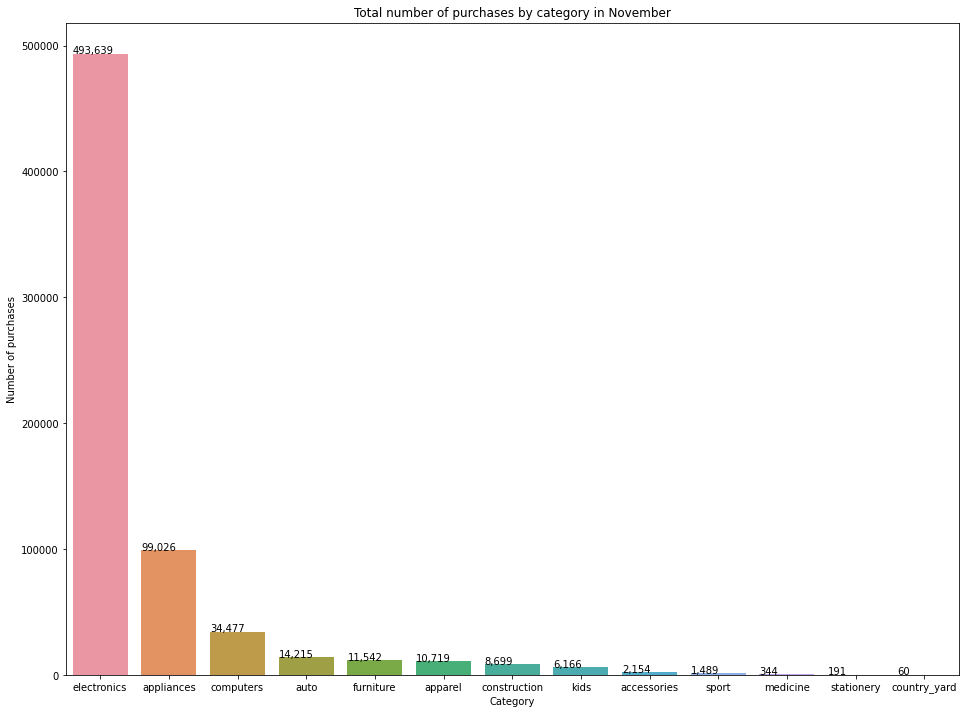

In [155]:
group_purchase_by_cat_nov=df_nov[df_nov['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat_nov = group_purchase_by_cat_nov.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category_nov = [str(i) for i in sorted_group_purchase_by_cat_nov.index]
ax= sns.barplot(index_category_oct,sorted_group_purchase_by_cat_nov)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in November')
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

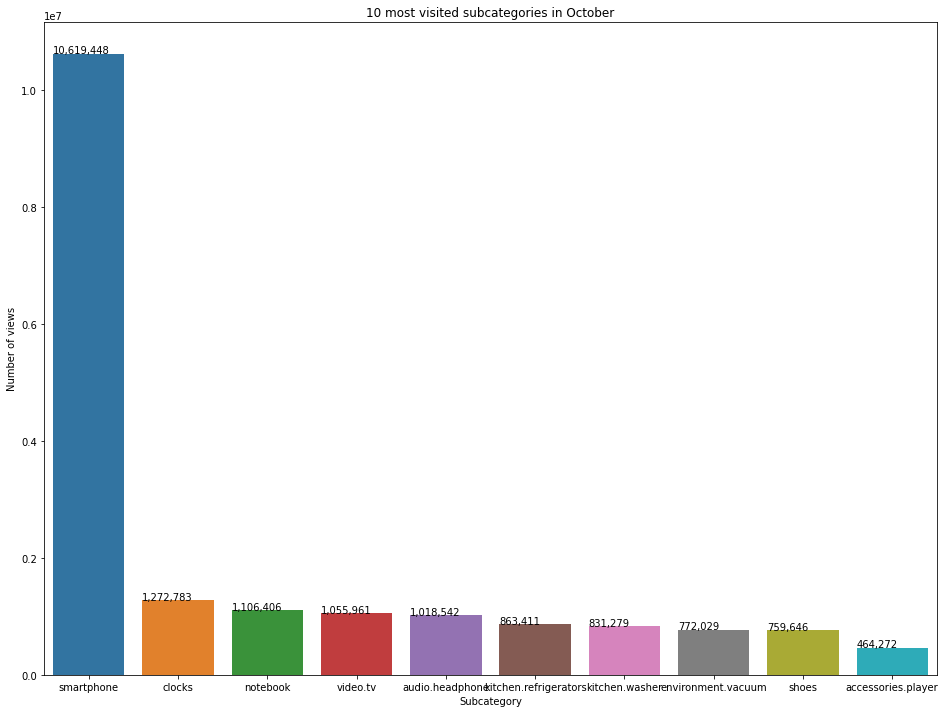

In [161]:
group_view_by_subcat_oct=df_oct[df_oct['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat_oct = group_view_by_subcat_oct.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category_oct = [str(i) for i in sorted_group_view_by_subcat_oct.index]
ax= sns.barplot(index_category_oct[:10],sorted_group_view_by_subcat_oct[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in October')
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

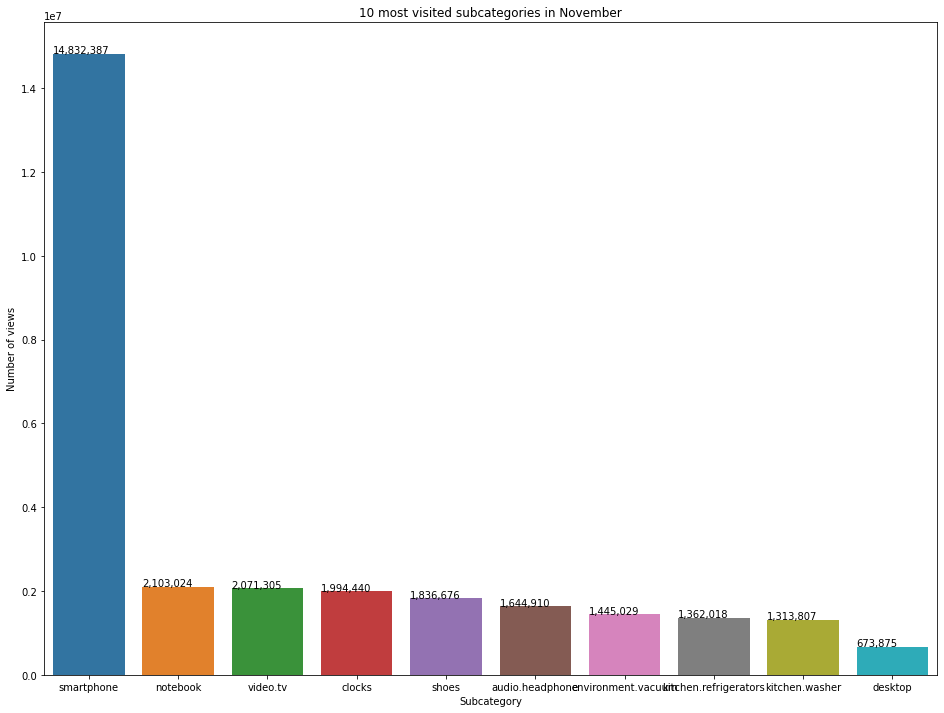

In [162]:
group_view_by_subcat_nov=df_nov[df_nov['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat_nov = group_view_by_subcat_nov.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category_nov = [str(i) for i in sorted_group_view_by_subcat_nov.index]
ax= sns.barplot(index_category_nov[:10],sorted_group_view_by_subcat_nov[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in November')
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [13]:
bf = df_oct['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df_oct[df_oct['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category    product_id
appliances  3700926      1675.000000
            3600661      1482.000000
            3600163      1017.000000
            3600666       877.000000
            2900536       831.000000
            3601405       768.000000
            3601485       627.000000
            2701657       566.000000
            3601244       559.000000
Name: purchase, dtype: float64
category   product_id
furniture  14701435     207.000000
           17200570     200.000000
           13201002     133.000000
           17200651     130.000000
           7101172       98.000000
           7900440       94.000000
           7100133       84.000000
           14701260      77.000000
           14701406      72.000000
Name: purchase, dtype: float64
category   product_id
computers  1307310      1003.000000
           1307073       864.000000
           1307366       722.000000
           1307067       651.000000
           1306650       649.000000
           1307074       416.000000
       

In [14]:
bf = np.delete(df_nov['category'].unique()
for i in bf:
    try:
        table4_nov = pd.pivot_table(df_nov[df_nov['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category    product_id
appliances  3700926      1764.000000
            3600661      1742.000000
            3601405      1140.000000
            3600666      1131.000000
            2900958       903.000000
            3700766       895.000000
            3601603       895.000000
            3600163       879.000000
            2702277       675.000000
Name: purchase, dtype: float64
No purchases in nan
category   product_id
computers  1307310      1329.000000
           1307545       879.000000
           1307188       829.000000
           1307073       740.000000
           1307067       538.000000
           1307076       500.000000
           1307589       473.000000
           1307004       390.000000
           1307187       388.000000
Name: purchase, dtype: float64
category   product_id
furniture  14701435     246.000000
           17200570     143.000000
           7100133      142.000000
           17200651     126.000000
           7901064      116.000000
           14701260

## [RQ4] How much does each brand earn per month? 

In [5]:
#made a pivot table to sum the selling price per each brand
brand_sum_oct = pd.pivot_table(df_oct, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum_oct

event_type,cart,purchase,view
brand,,,
a-case,113.78,275.26,42595.43
a-derma,NaN,12.36,3911.75
a-elita,NaN,NaN,8120.70
a-mega,NaN,1031.47,50477.36
aardwolf,NaN,NaN,3240.06
...,...,...,...
zte,15856.50,13623.87,908225.29
zubr,NaN,659.05,197828.04
zuru,NaN,25.68,998.44


In [6]:
brand_sum_nov = pd.pivot_table(df_nov, values='price', index=['brand'],

                    columns=['event_type'], aggfunc=sum)
brand_sum_nov

event_type,cart,purchase,view
brand,,,
a-case,2737.70,808.32,190290.42
a-derma,352.14,NaN,5861.50
a-elita,262.29,8.49,15080.47
a-mega,3019.41,908.68,61215.92
aardwolf,437.64,219.10,16647.40
...,...,...,...
zwerg,NaN,NaN,529.94
zwilling,NaN,NaN,22381.98
zwillingjahenckels,3400.89,NaN,1007443.33


In [7]:
#How much does each brand earn per month?
brand_revenue_October = brand_sum_oct['purchase'].sort_values(ascending=False)
brand_revenue_October

brand
apple      1.112093e+08
samsung    4.640753e+07
xiaomi     9.194033e+06
huawei     4.883422e+06
acer       3.576720e+06
               ...     
zoops               NaN
zorg                NaN
zpao                NaN
zvezda              NaN
zyxel               NaN
Name: purchase, Length: 3444, dtype: float64

In [8]:
brand_revenue_November= brand_sum_nov['purchase'].sort_values(ascending=False)
brand_revenue_November

brand
apple                 1.275125e+08
samsung               5.486988e+07
xiaomi                1.125987e+07
lg                    5.239019e+06
huawei                4.780682e+06
                          ...     
zwerg                          NaN
zwilling                       NaN
zwillingjahenckels             NaN
zx                             NaN
zyxel                          NaN
Name: purchase, Length: 4200, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [9]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

In [10]:
profit_of_brand('huawei',brand_sum_oct)

4883421.740000027

### Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [15]:
unique_brands_oct = df_oct['brand'].unique()
unique_brands_oct=np.delete(unique_brands_oct,2)
a=[]
for i in unique_brands_oct:
    m=[]
    m.append(i)
    m.append(profit_of_brand(i,brand_sum_oct))
    a.append(m)
df_a= pd.DataFrame(a)

unique_brands_nov = df_nov['brand'].unique()
unique_brands_nov=np.delete(unique_brands_nov,8)
b=[]
for i in unique_brands_nov:
    m=[]
    m.append(i)
    m.append(profit_of_brand(i,brand_sum_nov))
    b.append(m)
df_b= pd.DataFrame(b)

df_diff_2month = pd.merge(df_a, df_b, on=0, how='outer')
df_diff_2month.head()

,0,1_x,1_y
0,shiseido,2495.110000,2978.680000
1,aqua,6336.630000,7506.970000
2,lenovo,1752638.530000,2698106.300000
3,apple,111209268.820012,127512524.879992
4,pulser,297562.530000,397390.930000


In [16]:
df_diff_2month['loss']= df_diff_2month['1_y']-df_diff_2month['1_x']
df_diff_2month.dropna().sort_values(by = 'loss',ascending=True)

,0,1_x,1_y,loss
30,acer,3576719.520000,3347306.530000,-229412.990000
422,peda,219342.370000,48278.940000,-171063.430000
543,omabelle,347730.870000,201897.130000,-145833.740000
146,hubert,219706.360000,98882.010000,-120824.350000
8,huawei,4883421.740000,4780682.350000,-102739.390000
...,...,...,...,...
32,sony,2478196.680000,3862886.300000,1384689.620000
39,lg,3387887.960000,5239018.760000,1851130.800000
16,xiaomi,9194033.290000,11259865.959999,2065832.670000
10,samsung,46407532.610017,54869880.870011,8462348.259994


In [35]:
#make a function that calculates the percentage loss
def estimate_loss(brand):
    return 100 -df_diff_2month[df_diff_2month[0]==brand]['1_y'] *100 / df_diff_2month[df_diff_2month[0]==brand]['1_x']

In [36]:
print(estimate_loss('acer'))
print(estimate_loss('peda'))
print(estimate_loss('omabelle'))

30   6.414062
dtype: float64
422   77.989232
dtype: float64
543   41.938681
dtype: float64


### Is the average price of products of different brands significantly different? 

In [63]:
#Is the average price of products of different brands significantly different? 

table3_oct = pd.pivot_table(df_oct, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3_oct[:50]


event_type                               cart   purchase        view
subcategory             brand                                       
accessories.alarm       alligator         nan  38.610000   38.610000
                        cenmax      69.886786  69.861849   69.888815
                        centurion   88.973043  89.281605   87.392473
                        dowontec          nan        nan  411.850000
                        pandect    294.220000 294.220000  295.403259
                        pandora    190.840513 197.002402  347.468877
                        scher-khan        nan  72.070000   72.070000
                        starline   135.163306 140.513792  157.512180
                        tec        334.080000 251.967500  253.002167
                        tomahawk          nan  88.867470   82.218780
accessories.anti_freeze wurth             nan        nan   20.028716
accessories.compressor  alligator         nan  59.980000   59.980000
                        airline           nan  20.763333   30.388926
                        alca              nan  38.610000   41.279588
                        alteco            nan 123.040000  124.409820
                        autoprofi         nan  51.198889   47.151675
                        autovirazh        nan        nan   58.300769
                        avs               nan        nan   80.452651
                        berkut            nan 237.213333  241.746472
                        chameleon         nan  47.820000   47.798135
                        cityup            nan  47.362000   53.682048
                        denzel            nan 339.210943  310.085064
                        einhell           nan        nan  370.517468
                        fubag             nan 300.820000  413.937608
                        goodyear          nan        nan   71.380000
                        heyner            nan  46.330000   57.790331
                        hyundai           nan 342.840000  342.731396
                        kolner            nan   8.570000    9.803779
                        laston            nan 483.090000  378.787714
                        maakavto          nan        nan   46.370000
                        magnetta          nan 262.117778  292.380902
                        metabo            nan        nan  975.721941
                        newco             nan        nan  204.550000
                        novabright        nan        nan   49.050000
                        ryobi             nan        nan  102.940000
                        schneider         nan        nan 1135.113469
                        t-max             nan        nan  121.861862
                        tornado           nan        nan   36.067500
                        torso             nan        nan   27.410000
                        tpmaster          nan  20.590000   20.590000
                        voin              nan        nan   40.530000
                        xiaomi            nan        nan   79.800000
                        zubr              nan        nan   89.010000
accessories.parktronic  cenmax            nan  33.440000   33.440000
                        erisson           nan  36.040000   36.040000
                        flashpoint        nan        nan   25.480000
                        incar             nan        nan   96.530000
                        parkmaster        nan  65.886829   73.171763
                        pioneer           nan  55.855000   53.324361
accessories.player      incar             nan        nan  470.657489

In [64]:

table3_nov = pd.pivot_table(df_nov, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3_nov[:50]


event_type                               cart   purchase        view
subcategory             brand                                       
accessories.alarm       alligator   38.610000  38.610000   38.610000
                        cenmax      70.852337  71.037381   70.600665
                        centurion   86.133833  86.303356   86.603843
                        davinci     36.040000  36.040000   36.040000
                        dowontec   411.850000 411.850000  411.850000
                        pandect    305.891304 310.677500  289.927597
                        pandora    223.389751 210.894976  333.781953
                        scher-khan  99.313889  94.380000   92.089276
                        starline   141.970053 141.935617  156.906691
                        tec        231.403333        nan  236.219174
                        tomahawk    97.999690  97.110980   98.267180
accessories.anti_freeze ravenol     24.713333  21.023333   20.126569
                        wurth       20.987857  25.560000   20.042813
accessories.compressor  alligator         nan        nan   59.980000
                        airline     54.223077  11.580000   36.629672
                        alca        45.199535  43.293636   45.861349
                        alteco     132.560000 132.175000  131.922523
                        aurora            nan        nan  237.840000
                        autoprofi   53.811081  56.305000   52.897004
                        autovirazh        nan        nan   45.725385
                        avs         70.701136  67.495455   69.733541
                        berkut     241.486429 232.544000  243.637896
                        chameleon   51.161774  41.465000   54.571392
                        cityup      78.434000  76.135000   67.628868
                        denzel     305.869226 265.479800  297.167987
                        einhell    720.740000        nan  573.185000
                        fubag      272.407619 375.261429  304.612374
                        goodyear    71.380000        nan   70.738462
                        heyner      77.957143  82.370000   67.858873
                        hp                nan        nan  395.120000
                        hyundai    342.024375 342.061111  342.034483
                        kingtony          nan        nan  185.330000
                        kolner       9.010000   9.010000    9.000833
                        laston     352.097742 377.615714  365.327170
                        maakavto          nan        nan   46.370000
                        magnetta   170.238846 188.954043  288.453721
                        mateus     251.406000 220.680000  395.356708
                        metabo            nan        nan 1123.877582
                        newco             nan        nan  204.550000
                        novabright        nan        nan   49.050000
                        remeza            nan        nan  656.350769
                        ryobi       95.975263  90.910000   98.191917
                        schneider  319.950000 326.250000 1097.162278
                        t-max      129.477500        nan  125.474983
                        tornado           nan        nan   36.075000
                        torso       24.721579  23.826667   26.367382
                        tpmaster    20.590000  20.590000   20.590000
                        voin        37.376667        nan   37.920000
                        xiaomi      79.800000  79.800000   79.800000
                        zubr        67.660370  37.372222   86.087828

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [109]:
group_purchase_by_user=df_oct[df_oct['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
519267944   265569.520000
513117637   244500.000000
515384420   210749.770000
530834332   187128.930000
512386086   182470.800000
                 ...     
566252844        0.880000
538224876        0.880000
535243241        0.880000
534066409        0.880000
513085966        0.880000
Name: price, Length: 347118, dtype: float64

In [85]:
group_purchase_by_product=df_oct[df_oct['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

229957502.26999995

Percent of money 20 % of customers gave out of total 229957502.26999995: 72.05594325661541%


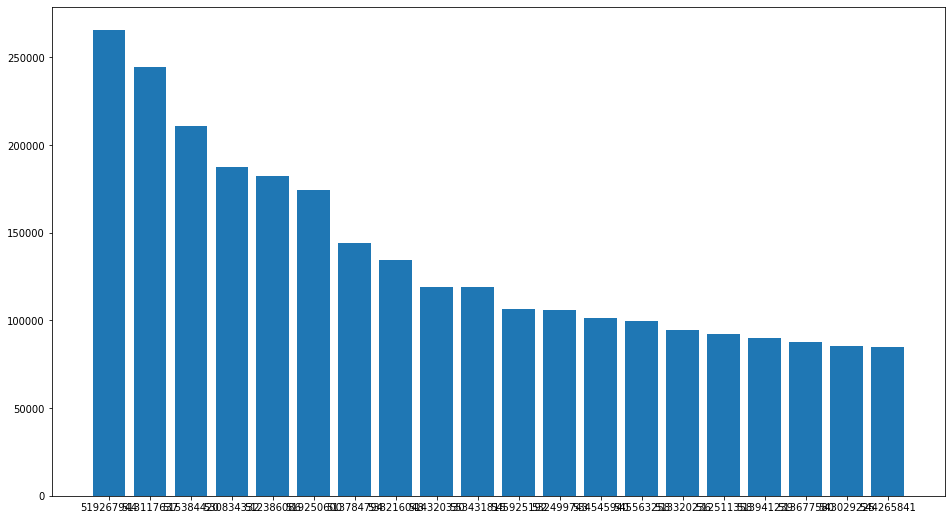

In [131]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))

Percent of money 20 % of customers gave out of total 275194890.50000006: 69.63857816974821%


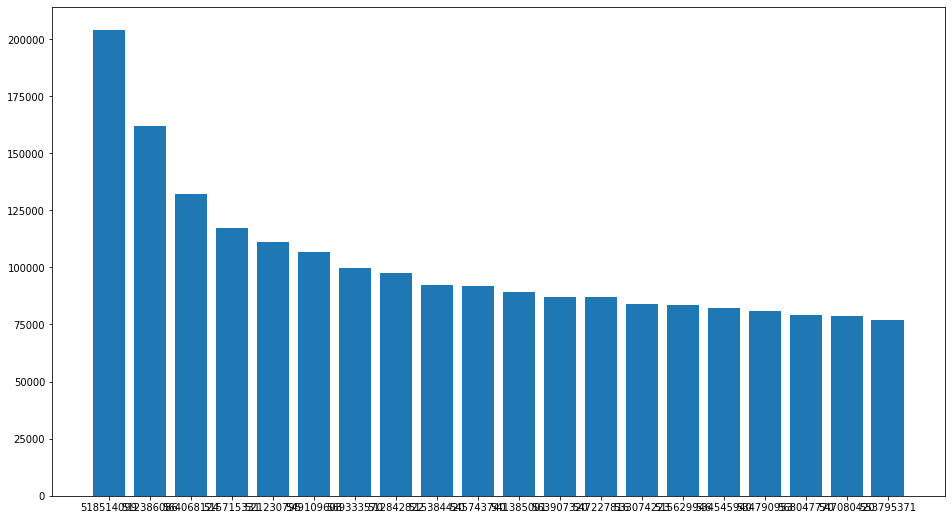

In [132]:
group_purchase_by_user_nov=df_nov[df_nov['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user_nov = group_purchase_by_user_nov.dropna().sort_values(ascending=False)
#Group by user and sort all purchases by descending order
group_purchase_by_product_nov=df_nov[df_nov['event_type']=='purchase']['price'].sum()
#get all the revenue that was made in this month
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers_nov = len(sorted_group_purchase_by_user_nov) * 0.2
#Count % of money that 20% of top customers gave
index_user_nov = [str(i) for i in sorted_group_purchase_by_user_nov.index]
plt.bar(index_user_nov[:20],sorted_group_purchase_by_user_nov[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product_nov,sum(sorted_group_purchase_by_user_nov[:int(amount_of_20percent_customers_nov)]) /(group_purchase_by_product_nov/100) ))